In [32]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

folder_path = "/Users/rohinpalsule/Documents/GitHub/GraphWalkFlights/Graph-Walk-Flight_Psiturk_by_Jerry_Rohin/data"

df_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            if 'Peoria' in df_individual['cities'][0]:
                df_individual['city_type'] = 'US'
            else: df_individual['city_type'] = 'Fictional'
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)


Reading: S_Kirthin V. Rajkumar_2011_243.csv
Reading: final_S_ .csv


In [40]:
# Adding partid from worker id

df['partid'] = df['responses'].str.replace('{worker_id:',"").str.replace('}', '').str.replace("Kirthin V. Rajkumar","Kirthin") # for clarity
df.loc[df['partid'] == ' ', 'partid'] = 'Rayan' # Replacing id " " w his name
df['partid'] = df['partid'].ffill()

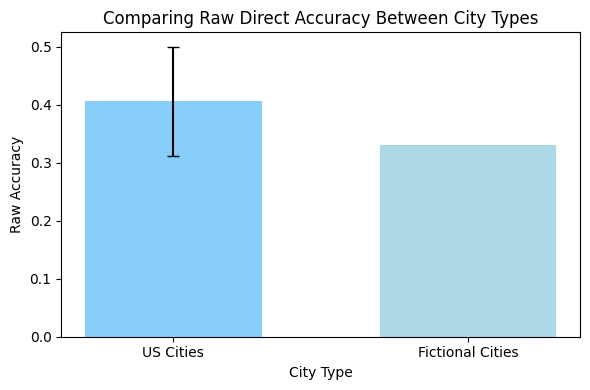

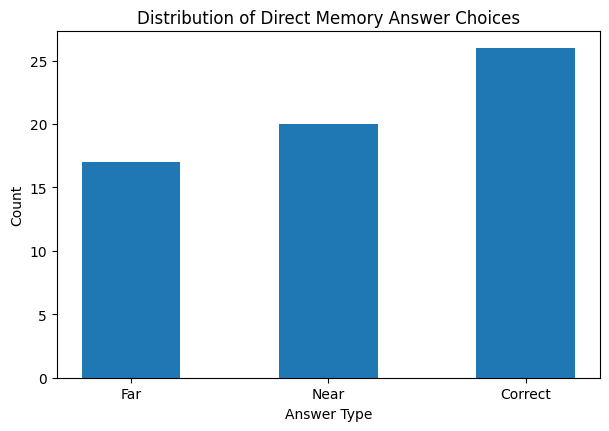

In [100]:
# Direct Memory df

direct_df = df[df['trial_type']=='directmemory_phase']

direct_df = direct_df.loc[:, ~direct_df.isna().all()]
direct_df = direct_df.drop(columns=['time_elapsed','cumulative_accuracy','weighted_accuracy','missedtrial']).reset_index(drop='index')
direct_df = direct_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
direct_df = direct_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)

def get_chosen_city(row):
    if  row['key_press'] == 49:
        return row['stimulus_down_left']
    elif  row['key_press'] == 50:
        return row['stimulus_down_mid']
    elif  row['key_press'] == 51:
        return row['stimulus_down_right']
    else: return pd.NA

def get_wrong_distance(row):
    if pd.isna(row['stimulus_selected']):
        return pd.NA
    elif row['stimulus_selected'] == row['stimulus_short']:
        return 'close'
    elif row['stimulus_selected'] == row['stimulus_far']:
        return 'far'
    elif row['stimulus_selected'] == row['stimulus_correct']:
        return 'correct'
    else: return pd.NA

def get_weighted_correct(row):
    if pd.isna(row['wrong_distance']):
        return pd.NA
    elif row['wrong_distance'] == 'close':
        return 0.5
    elif row['wrong_distance'] == 'far':
        return 0
    elif row['wrong_distance'] == 'correct':
        return 1
    else: return pd.NA

direct_df['stimulus_selected'] = direct_df.apply(get_chosen_city,axis=1)
direct_df['wrong_distance'] = direct_df.apply(get_wrong_distance,axis=1)
direct_df['weighted_correct'] = direct_df.apply(get_weighted_correct,axis=1)


direct_US = direct_df[direct_df['city_type'] == 'US'].groupby('partid')['accuracy'].mean()
direct_fictional = direct_df[direct_df['city_type'] == 'Fictional'].groupby('partid')['accuracy'].mean()

# Bar chart of prob
plt.figure(figsize=(6,4))
plt.bar(x=0.25,height=direct_US.mean(),yerr=direct_US.sem(),capsize=4,color='lightskyblue',width=0.3,label='US Cities')
plt.bar(x=0.75,height= 0.33,yerr=direct_fictional.sem(),capsize=4,color='lightblue',width=0.3,label='Fictional Cities')
plt.xticks([0.25,0.75],['US Cities','Fictional Cities'])
plt.xlabel("City Type")
plt.ylabel("Raw Accuracy")
plt.title("Comparing Raw Direct Accuracy Between City Types")
plt.tight_layout()
plt.show()

# Histogram of weighted prob
plt.figure(figsize=(6,4))
plt.hist(direct_df[~direct_df['weighted_correct'].isna()]['weighted_correct'],5)
plt.tight_layout()
plt.title("Distribution of Direct Memory Answer Choices")
plt.xticks([0.1,0.5,0.9],['Far',"Near","Correct"])
plt.ylabel("Count")
plt.xlabel("Answer Type")
plt.show()

In [105]:
# Relative Distance Judgement Analysis
shortest_df = df[df['trial_type']=='shortestpath_phase']

shortest_df = shortest_df.loc[:, ~shortest_df.isna().all()]
shortest_df = shortest_df.drop(columns=['time_elapsed','cumulative_accuracy']).reset_index(drop='index')
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/US_Cities_List/', '') if isinstance(x, str) else x)
shortest_df = shortest_df.map(lambda x: x.replace('../static/images/Fictional_Cities_List/', '') if isinstance(x, str) else x)
shortest_df.groupby(['partid','specific_pairs']).describe()['accuracy']

count      mean       std  min   25%  50%   75%  \
partid  specific_pairs                                                          
Kirthin Five Edge Six Edge      6.0  0.666667  0.516398  0.0  0.25  1.0  1.00   
        Four Edge Five Edge     6.0  0.333333  0.516398  0.0  0.00  0.0  0.75   
        Four Edge Six Edge      8.0  0.625000  0.517549  0.0  0.00  1.0  1.00   
        Three Edge Five Edge    8.0  0.375000  0.517549  0.0  0.00  0.0  1.00   
        Three Edge Four Edge    6.0  0.500000  0.547723  0.0  0.00  0.5  1.00   
        Two Edge Five Edge     24.0  0.291667  0.464306  0.0  0.00  0.0  1.00   
        Two Edge Four Edge      8.0  0.375000  0.517549  0.0  0.00  0.0  1.00   
        Two Edge Six Edge      13.0  0.461538  0.518875  0.0  0.00  0.0  1.00   
        Two Edge Three Edge     6.0  0.500000  0.547723  0.0  0.00  0.5  1.00   
Rayan   Five Edge Six Edge      6.0  0.333333  0.516398  0.0  0.00  0.0  0.75   
        Four Edge Five Edge     6.0  0.666667  0.516398  0.0  0.25  1.0  1.00   
        Four Edge Six Edge      8.0  0.625000  0.517549  0.0  0.00  1.0  1.00   
        Three Edge Five Edge    8.0  0.875000  0.353553  0.0  1.00  1.0  1.00   
        Three Edge Four Edge    6.0  0.500000  0.547723  0.0  0.00  0.5  1.00   
        Two Edge Five Edge     24.0  0.500000  0.510754  0.0  0.00  0.5  1.00   
        Two Edge Four Edge      8.0  0.125000  0.353553  0.0  0.00  0.0  0.00   
        Two Edge Six Edge      13.0  0.769231  0.438529  0.0  1.00  1.0  1.00   
        Two Edge Three Edge     6.0  0.500000  0.547723  0.0  0.00  0.5  1.00   

                              max  
partid  specific_pairs             
Kirthin Five Edge Six Edge    1.0  
        Four Edge Five Edge   1.0  
        Four Edge Six Edge    1.0  
        Three Edge Five Edge  1.0  
        Three Edge Four Edge  1.0  
        Two Edge Five Edge    1.0  
        Two Edge Four Edge    1.0  
        Two Edge Six Edge     1.0  
        Two Edge Three Edge   1.0  
Rayan   Five Edge Six Edge    1.0  
        Four Edge Five Edge   1.0  
        Four Edge Six Edge    1.0  
        Three Edge Five Edge  1.0  
        Three Edge Four Edge  1.0  
        Two Edge Five Edge    1.0  
        Two Edge Four Edge    1.0  
        Two Edge Six Edge     1.0  
        Two Edge Three Edge   1.0